Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Baixando os dados

In [ ]:
housing = pd.read_csv('/content/sample_data/housing.csv')

Analisando os dados

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


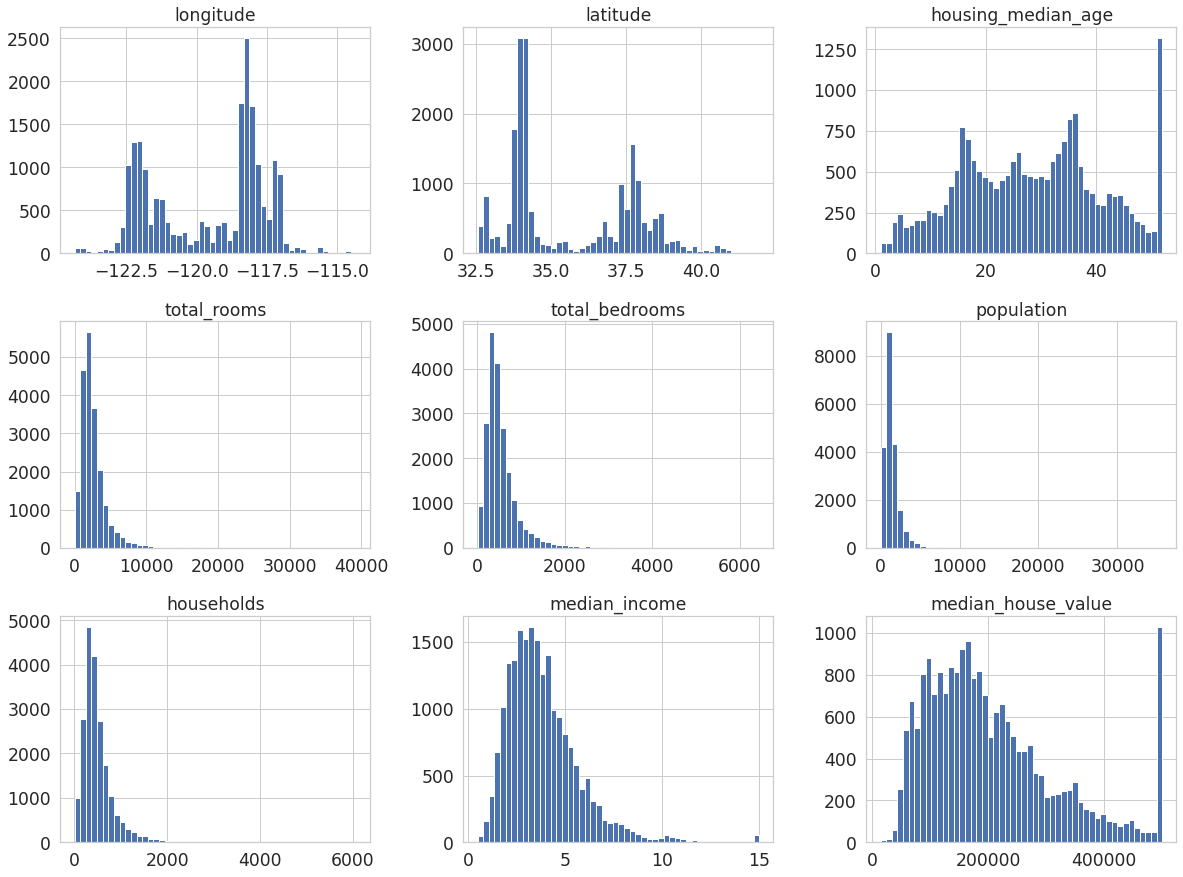

In [ ]:
housing.hist(bins=50, figsize=(20,15))
display()

Dividir os dados em treino e teste

In [ ]:
housing.duplicated().any() #Checando dados duplicados

False

In [ ]:
housing.corr()["median_house_value"].sort_values(ascending=False) #Observando qual é o dado mais relevante

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Median income possui uma grande influencia na variável target, então segmentarei os dados baseado nessa variável

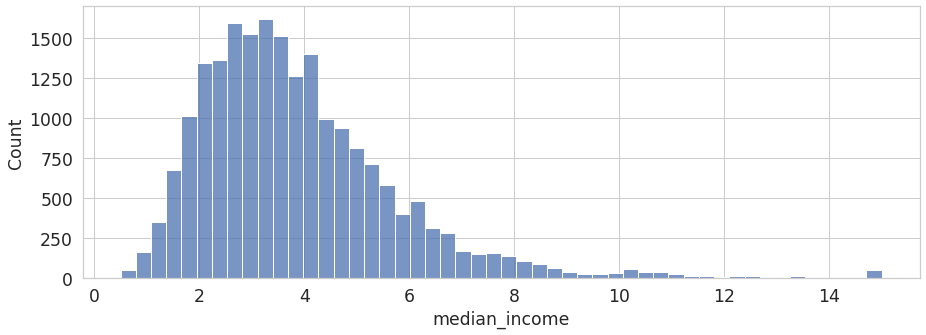

In [ ]:
sns.histplot(data=housing, x='median_income', bins=50)

Dividindo os dados em grupo, de acordo com a distribuição.

In [ ]:
housing['median_income_group'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf],
                                        labels=[1, 2, 3, 4, 5], include_lowest=True)

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_group
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [ ]:
# Proporção de cada grupo
housing['median_income_group'].value_counts() / len(housing['median_income_group'])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: median_income_group, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

#Divisão dos dados, mantendo a proporção dos grupos
housing_train, housing_test = train_test_split(housing, test_size=0.2, stratify=housing['median_income_group'], random_state=42)

In [ ]:
housing_train['median_income_group'].value_counts() / len(housing_train['median_income_group'])


3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: median_income_group, dtype: float64

In [ ]:
#Removendo a coluna dos grupos
housing_train = housing_train.drop(columns=['median_income_group'])
housing_test = housing_test.drop(columns=['median_income_group'])

Checando valores nulos, e preenchendo-os

In [ ]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


Total bedrooms possui valores nulos

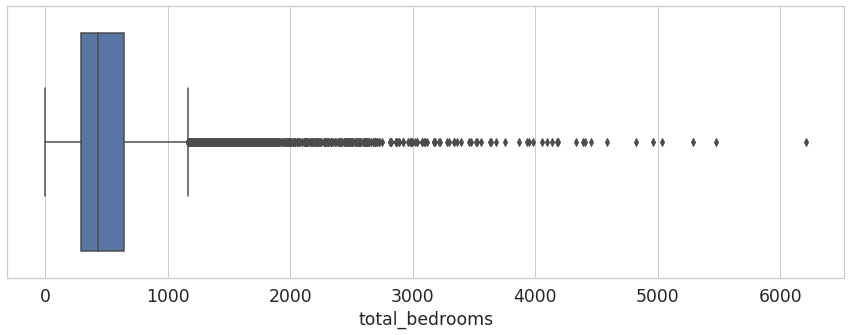

In [ ]:
sns.boxplot(data=housing_train, x='total_bedrooms')


Essa variável possui diversos outliers, portanto irei preencher os valores nulos utilizando a mediana, para evitar enviesamento

In [ ]:
median_total_bedrooms = housing_train['total_bedrooms'].median()
median_total_bedrooms

433.0

In [ ]:
housing_train['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

Farei o mesmo para os dados de teste, utilizando a mediana do proprio dataset de teste, para não contaminar os dados com os de treino.

In [ ]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [ ]:
median_total_bedrooms = housing_test['total_bedrooms'].median()
median_total_bedrooms

442.0

In [ ]:
housing_test['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

Variável ocean_proximity é uma variável categorica, portanto irei utilizar one hot encoding para transforma-la

In [ ]:
housing_train['ocean_proximity'].value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [ ]:
housing_train = pd.get_dummies(drop_first = True, data=housing_train, columns=['ocean_proximity']) #Dropando o primeiro para evitar o dummy variable trap
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,1,0,0,0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,0,0,0,1
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,1,0,0,0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,0,0,0,1
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,0,0,0,0


In [ ]:
housing_test = pd.get_dummies(drop_first = True, data=housing_test, columns=['ocean_proximity']) #Dropando o primeiro para evitar o dummy variable trap
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,0,0,0,0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,0,0,0,0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,0,0,0,0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,0,0,0,0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,0,0,0,1


Dividindo as variáveis independentes e dependentes e transformando em um array

In [ ]:
X_train = housing_train.drop(columns=['median_house_value']).values
y_train = housing_train['median_house_value'].copy().values
X_test = housing_test.drop(columns=['median_house_value']).values
y_test = housing_test['median_house_value'].copy().values


Utilizando o modelo Decision Tree Regressor e GridSearchCV para achar os melhores parametros

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
parameters={"criterion": ["squared_error", "friedman_mse","absolute_error","poisson"],
            "max_depth" : [3,7,12],
            "min_samples_leaf":[3,6,9],
            "min_samples_split":[3,7,9],
            }
search = GridSearchCV(estimator=tree, param_grid=parameters,cv=5)
search.fit(X_train, y_train)
tree = DecisionTreeRegressor(criterion=search.best_estimator_.criterion, 
                               max_depth=search.best_estimator_.max_depth, 
                               min_samples_leaf=search.best_estimator_.min_samples_leaf,
                               min_samples_split=search.best_estimator_.min_samples_split)
tree.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=12, min_samples_leaf=9, min_samples_split=7)

In [109]:
from sklearn.metrics import mean_squared_error

r2_score = tree.score(X_test, y_test)
print(f'R2 = {r2_score}')

y_test_pred = tree.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'RMSE = {rmse}')

R2 = 0.7438262354770372
RMSE = 57781.927427332994


A acurácia do modelo se encontra em 74,38%, no entanto, o RMSE indica que a grandeza do erro é em torno de 57781